In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
import re
import plotly.graph_objects as go
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_absolute_percentage_error
import plotly.graph_objects as go

# **ТИП ТОПЛИВА И ОБЬЕМ ДВИГАТЕЛЯ. ЛИНЕЙНАЯ МОДЕЛЬ**

In [2]:
processed_df = pd.read_csv('processed_df.csv')

In [3]:
processed_df.columns

Index(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan',
       'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'year', 'selling_price',
       'km_driven', 'Diesel', 'Individual', 'Dealer', 'Manual', 'First Owner',
       'Second Owner', 'Third Owner', 'Fourth & Above Owner', 'milage',
       'engine', 'max_power', 'torque', 'RPM_min', 'seats'],
      dtype='object')

**ВЫБОР ДВУХ ПРИЗНАКОВ- ТИП ТОПЛИВА И ОБЬЕМ ДВИГАТЕЛЯ**

In [4]:
processed_df = processed_df.loc[:, ['Diesel', 'engine', 'selling_price']].dropna()

**НОРМАЛИЗУЕМ ПРИЗНАКИ ПО СРЕДСТВАМ SNADART SCALLER**

In [5]:
scaler = StandardScaler()
x = scaler.fit_transform(processed_df.loc[:, ['Diesel', 'engine']])
y = processed_df['selling_price']

**ДЛЯ НАЧАЛА ПОПРОБУЕМ ОБУЧИТЬ НА ПРИМЕРЕ ОДНОЙ СТЕПЕНИ ПОЛИНОМА**

In [6]:
poly = PolynomialFeatures(2)
x_poly = poly.fit_transform(x)
x_poly

array([[ 1.        ,  0.90175469, -0.42334643,  0.81316153, -0.38175463,
         0.1792222 ],
       [ 1.        ,  0.90175469,  0.07346712,  0.81316153,  0.06624932,
         0.00539742],
       [ 1.        , -1.10894904,  0.07147987,  1.22976797, -0.07926753,
         0.00510937],
       ...,
       [ 1.        ,  0.90175469, -0.42334643,  0.81316153, -0.38175463,
         0.1792222 ],
       [ 1.        ,  0.90175469, -0.12923281,  0.81316153, -0.11653629,
         0.01670112],
       [ 1.        ,  0.90175469, -0.12923281,  0.81316153, -0.11653629,
         0.01670112]])

In [7]:
reg_1 = LinearRegression(fit_intercept=False)
cv_results = cross_validate(reg_1, x_poly, y, cv=5, return_train_score=True, scoring='neg_mean_absolute_percentage_error')
print(cv_results['test_score'])
print(cv_results['train_score'])

[-0.90707285 -0.9289455  -0.86285544 -0.96217484 -0.93307167]
[-0.90401779 -0.93930558 -0.89954876 -0.9289453  -0.91526563]


# **TODO:**

1. запилить в цикл по степени полинома, можно реализовать вычисление своей функции потерь (smape, mape, mae?)
!!! кросс валидация sklearn.model_selection.cross_validate!!!
2. пострроить гафики, где х - степень полинома, у - потери (разными метриками)

# **ЗАВИСИМОСТЬ СТЕПЕНИ ПОЛИНОМА ОТ ПОТЕРЬ**

**1. СОЗДАДИМ СПИСОК СТЕПЕНЕЙ ПОЛИНОМА**

In [32]:
poly_power = np.arange(1, 101, 5)
poly_power

array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81,
       86, 91, 96])

**СОЗДАДИМ ДФ В КОТОРЫЙ БУДЕМ ЗАПИСЫВАТЬ РЕЗУЛЬТАТЫ**

**ЦИКЛ С ПЕРЕБОРОМ СТЕПЕНЕЙ ПОЛИНОМА. ПОТЕРИ- MAPE**

In [37]:
poly_loss_df = pd.DataFrame({'poly': [], 'loss_train': [], 'loss_test': []})
for p in poly_power:
    # генерация признаков с полиномом степени p
    polynom = PolynomialFeatures(p)
    x_poly = polynom.fit_transform(x)
    # оздание обьекта линейной модели обучения. fit_intercept=False для того, что бы модель не добавляла единичный столбец к матрице признаков для свободного коэффициента w
    reg = LinearRegression(fit_intercept=False)
    # применяем кросс-валидацию для поиска потерь
    cv_results = cross_validate(reg_1, x_poly, y, cv=5, return_train_score=True, scoring='neg_mean_absolute_percentage_error')
    # записываем стредние потери для тестовых и тренировочных датасетов в датафрейм
    poly_loss_df_mae.loc[len(poly_loss_df_mae.index)] = [p, np.mean(np.array(cv_results['train_score'])), np.mean(np.array(cv_results['test_score']))]
poly_loss_df_mae

KeyboardInterrupt: 

In [38]:
poly_loss_df_mae

,poly,loss_train,loss_test
0,1.0,-0.880270,-8.804903e-01
1,2.0,-0.917417,-9.188241e-01
2,3.0,-0.888906,-8.891584e-01
3,4.0,-0.977792,-9.795166e-01
4,5.0,-0.896167,-8.985025e-01
...,...,...,...
71,26.0,-1.076363,-1.146390e+05
72,31.0,-1.113602,-8.940106e+05
73,36.0,-0.972140,-1.240366e+07
74,41.0,-0.987244,-8.910355e+06


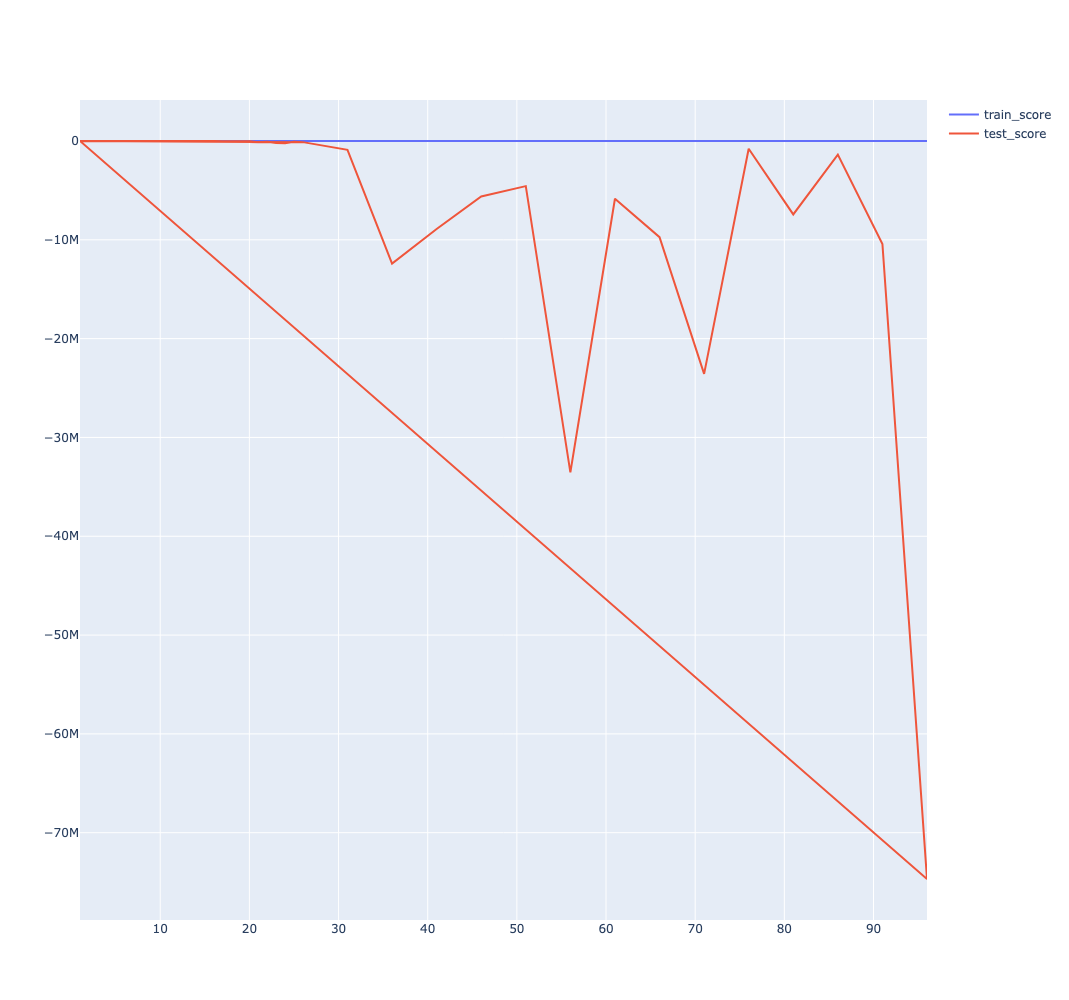

In [40]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=poly_loss_df_mae['poly'], y=poly_loss_df_mae['loss_train'], mode='lines', name='train_score'))
fig.add_trace(go.Scatter(x=poly_loss_df_mae['poly'], y=poly_loss_df_mae['loss_test'], mode='lines', name='test_score'))
fig.update_layout(width = 1400, height=1000)
fig.show()

**ПОТЕРИ MAE**

In [18]:
poly_loss_df_mae = pd.DataFrame({'poly': [], 'loss_train': [], 'loss_test': []})
for p in poly_power:
    # генерация признаков с полиномом степени p
    polynom = PolynomialFeatures(p)
    x_poly = polynom.fit_transform(x)
    # оздание обьекта линейной модели обучения. fit_intercept=False для того, что бы модель не добавляла единичный столбец к матрице признаков для свободного коэффициента w
    reg = LinearRegression(fit_intercept=False)
    # применяем кросс-валидацию для поиска потерь
    cv_results = cross_validate(reg_1, x_poly, y, cv=5, return_train_score=True, scoring='neg_mean_absolute_percentage_error')
    # записываем стредние потери для тестовых и тренировочных датасетов в датафрейм
    poly_loss_df_mae.loc[len(poly_loss_df_mae.index)] = [p, np.mean(np.array(cv_results['train_score'])), np.mean(np.array(cv_results['test_score']))]
poly_loss_df_mae

,poly,loss_train,loss_test
0,1.0,-0.880270,-0.880490
1,2.0,-0.917417,-0.918824
2,3.0,-0.888906,-0.889158
3,4.0,-0.977792,-0.979517
4,5.0,-0.896167,-0.898502
5,6.0,-0.893544,-0.897627
6,7.0,-0.806662,-0.811735
7,8.0,-0.830205,-0.836313
8,9.0,-0.775611,-0.780792
9,10.0,-0.768229,-0.793450


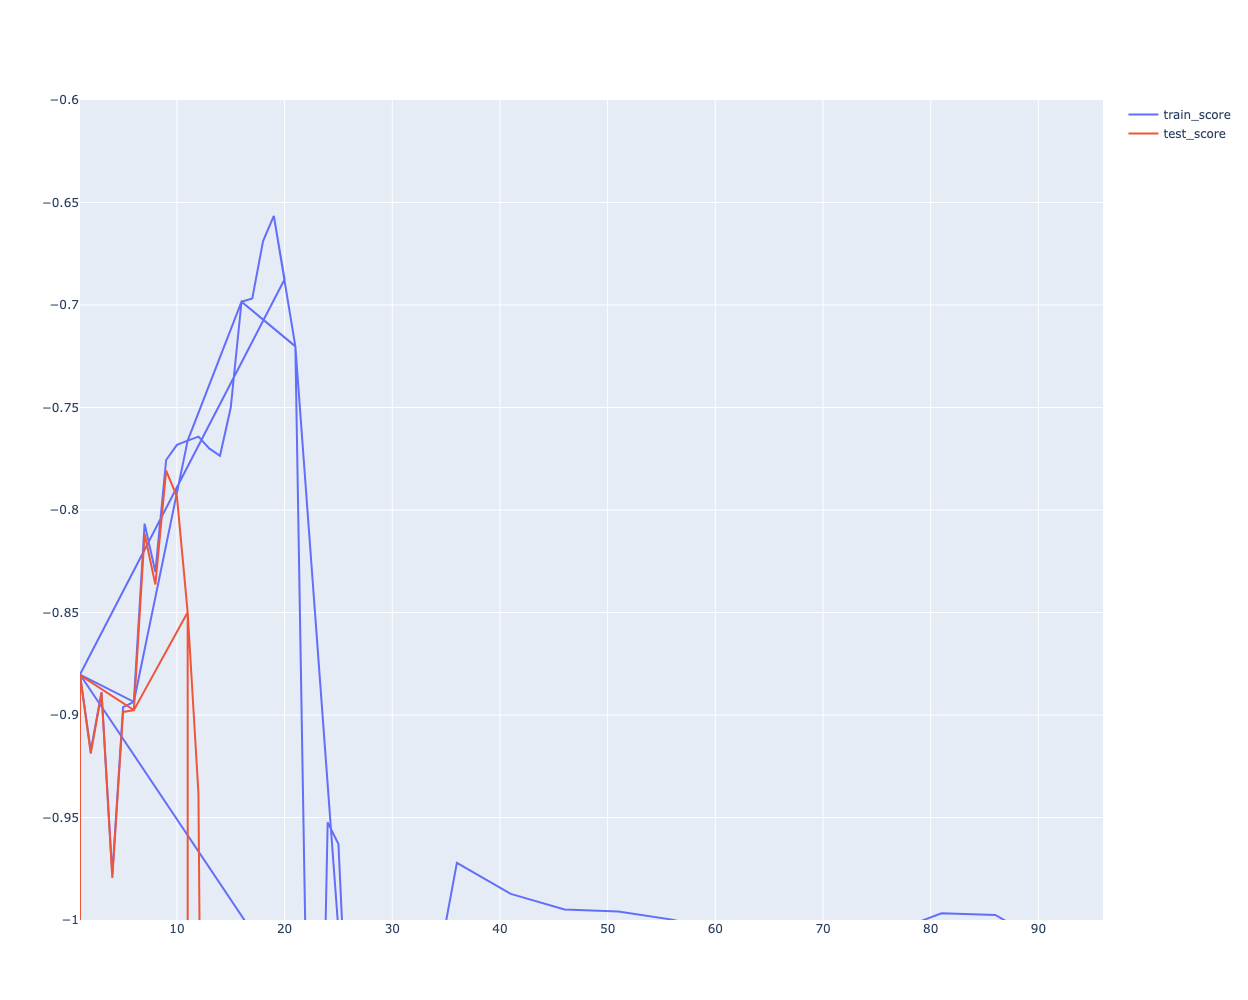

In [34]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=poly_loss_df_mae['poly'], y=poly_loss_df_mae['loss_train'], mode='lines', name='train_score'))
fig.add_trace(go.Scatter(x=poly_loss_df_mae['poly'], y=poly_loss_df_mae['loss_test'], mode='lines', name='test_score'))
fig.update_layout(width = 1200, height=1000, yaxis_range=[-1, -0.6])
#fig.update_yaxes(type="log")
fig.show()

# **ПРОБЕГ И КРУТЯЩИЙ МОМЕНТ. ЛИНЕЙНАЯ МОДЕЛЬ**

In [13]:
processed_df = pd.read_csv('processed_df.csv')
kmdriven_torque_data = processed_df.loc[:, ['km_driven', 'torque']]